# **COVID-19 Impact on Enviroment**

Covid-19 has spread across the world and has affected 213 countries to more than 5 million people.As in 21st Century, Enormous effort are in place to restore environment standards.The study says the Covid-19 led to drop in pollution across the world.the Contingency measure have improved air and water quality,clean beaches and environment noise reduction.
so, we will study this factor in Detail.

The air around is made up many gases and particles - Each so Small, for the most part, They're invisible to naked Eyes. 
    Yet they can Cause enormous health issues and Different countries across The World Where Facing health challenges due to spread of COVID-19. Hence, in this notebook we are going to explore the impact on air quality due to Covid-19.

**The Data used Contain following Feature**
- PM2.5/PM10 - It represents the value of particulate matter measured
- NO
- NO2
- NOx 
- NH3
- CO
- SO2
- O3
- Benzene
- Toluene
- Xylene
- AQI - Measure of Air quality index. 


    ### **Data**
- **Google Earth Engine-Sentinel-5P OFFL NO2: Offline Nitrogen Dioxide:** [GEE](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2) This dataset provides offline high-resolution imagery of NO2 concentrations.
- **Google Earth Engine- Tropomi**
- **NOAA CDR AVHRR NDVI: Normalized Difference Vegetation Index, Version 5**
- **Air Quality Data :** [Kaggle](https://www.kaggle.com/rohanrao/air-quality-data-in-india ) or we can also get it from [CPCB](https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing)
    

### **What is AQI ?**
Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

The Official Scale Provided by government is as Follows

![AQI](https://www.extremetech.com/wp-content/uploads/2018/11/Range-of-AQI-values-for-the-USA.jpg)

**What is Impact of poor air Quality ?**
- The World's Greatest Environmental Threat to Health

Official statistics from the World Health Organisation state that 92% of us live in areas where air pollution exceeds the guidelines considered to be safe, 9/10 people breathe polluted air each day. The average number of deaths caused by air pollution in India was over 1.66 million in 2019.

- Huge Economic Cost 

The cost of air pollution to the global economy is huge. According to the World Bank, it costs us $5 trillion each year in welfare costs and $225 billion in lost income.Air pollution is so detrimental to national and global economic health that the UN created a new Wealth Index which factors the economic burden of air pollution on national economies. 



### **Region Focused** 
The Focus of this analyses will be on The National Capital Territory (NCT) of Delhi it is a massive metropolitan area in the Country north.





### **Framing the Question ?**
- What impact does Covid-19 have on air quality in Delhi ?
- Does national Air Quality standards are been followed ?
- what other changes Does Covid-19 have in Environment ?

In [242]:
# Libraries which are used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pvlib.location import Location
import ee
import geemap
from scipy.stats import f_oneway,ttest_1samp
import datetime as dt

In [310]:
# changes in Sky are they clear during lockdown.
# DNI is acronym for Diffused Normal Irradiance which represents the amount of light that is coming perpendicular to surface. The surface here represents ground or something parallel to ground. This type of irradiance belongs to rays that come in a straight line from the direction of the sun at its current position in the sky. Solar collectors, panels maximize this DHI by means of tilting or rotating with angle of sun.
# DHI is acronym for Diffused Horizontal Irradiance which represents solar radiation that does not arrive on a direct path from the sun, but has been scattered by clouds and particles in the atmosphere and comes equally from all directions.
# GHI is acronym for Global Horizontal Irradiance which represents the total amount of shortwave radiation received from above by a surface which is horizontal (parallel) to the ground. GHI is the most important parameter for calculation of PV electricity yield. Both DHI & DNI are actually components of GHI and mathematically,
# loc = Location(28.610912462627958, 77.20605302696711,"Asia/Kolkata",700, 'Delhi')
# times = pd.date_range(start="2020-02-01", end="2020-02-29", freq='20H', tz=loc.tz)
# times1 = pd.date_range(start="2020-06-1", end="2020-06-30", freq='20H', tz=loc.tz)
# df_sky = loc.get_clearsky(times)
# df_sky1 = loc.get_clearsky(times1)
# df_sky.plot(figsize = [10,8])
# df_sky1.plot(figsize = [10,8])

In [244]:
# Reading the data 
df = pd.read_csv("city_day.csv")

In [245]:
df_delhi = df[df.City == "Delhi"].reset_index(drop=True)

Recognizing Which gases affect most on AQI

In [293]:
from sklearn.feature_selection import SelectKBest,chi2
df_feature = df_delhi.iloc[:,2:-1]
df_feature = df_feature.fillna(df_feature.mean())

In [294]:
X = df_feature.drop(columns=['Xylene', "AQI"] )
y = df_feature.AQI
y=y.astype('int')
test = SelectKBest(score_func= chi2, k=4)
fit = test.fit(X,y)

<AxesSubplot:xlabel='Name'>

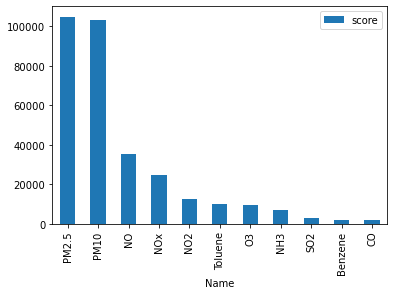

In [300]:
np.set_printoptions(precision= 2)
name = X.columns
Score = list(fit.scores_)

Feature = pd.DataFrame({"Name" : name , "score" : Score})
Feature = Feature.set_index(Feature["Name"])
(Feature.sort_values(by = "score", ascending= False)).plot.bar()

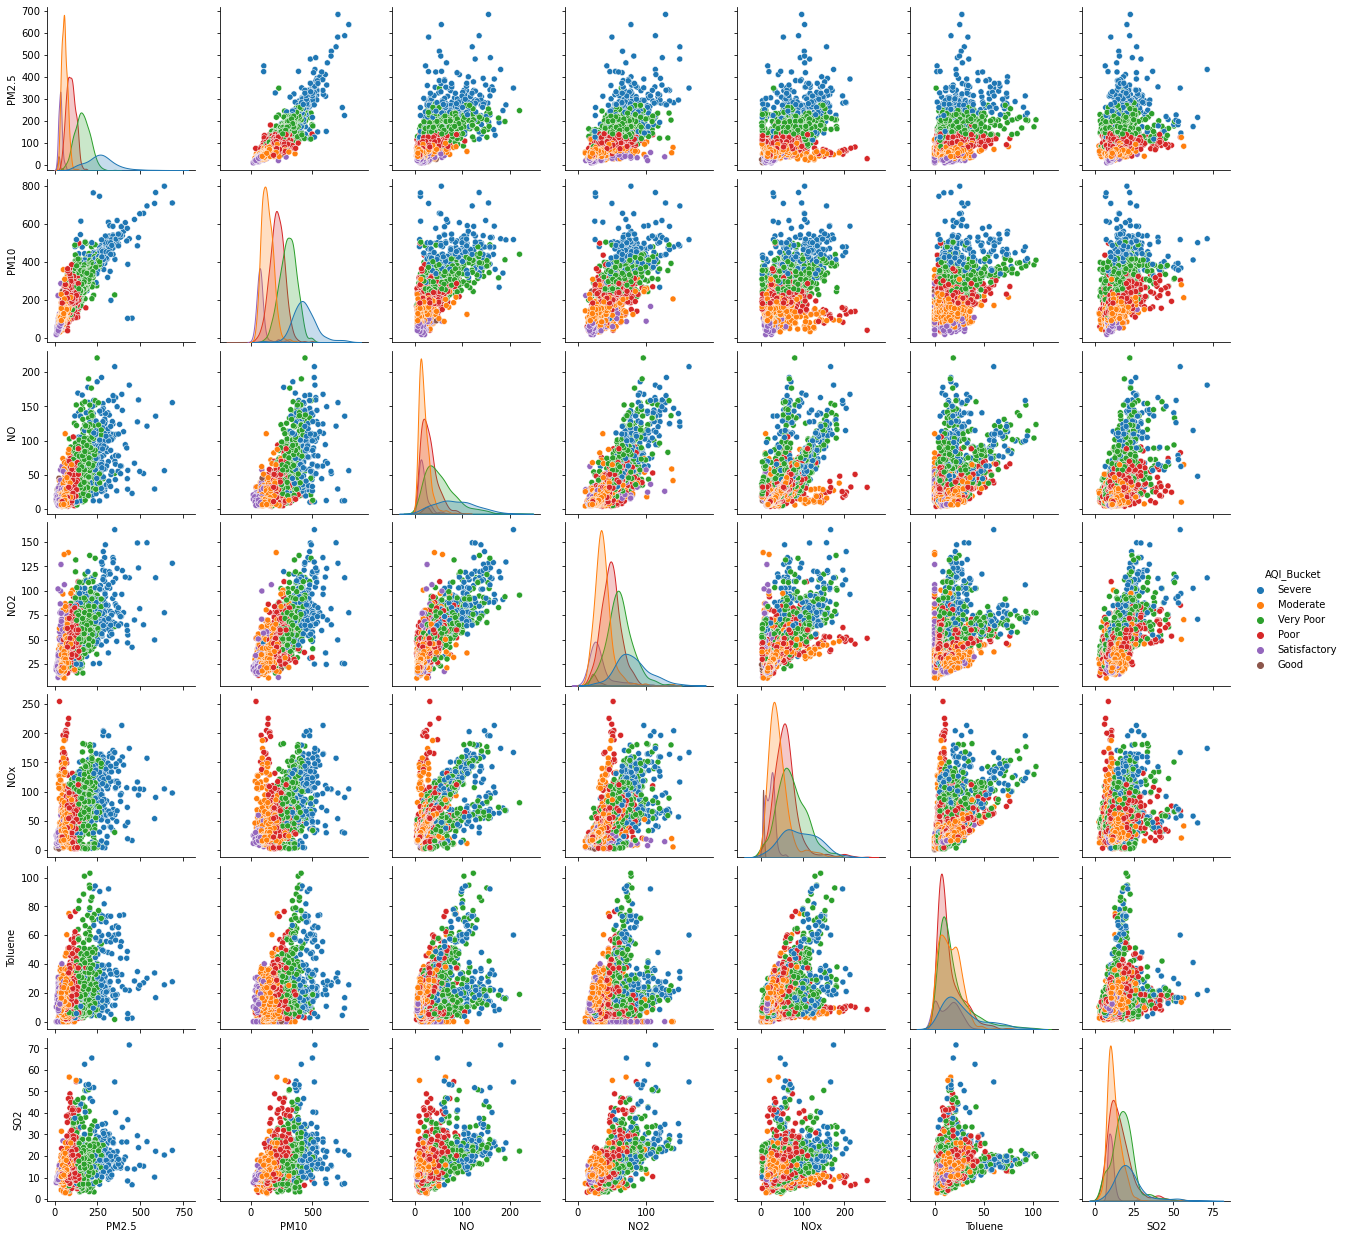

In [309]:
col = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','Toluene', 'SO2','AQI_Bucket']
sns.pairplot(df_delhi[col], hue = "AQI_Bucket")

From Above plot we can see top 5 gases which affect Air Quality index most.

In [249]:
df1 = df_delhi.copy()
df1['Date'] = pd.to_datetime(df1['Date'])

In [250]:
df1 = df1.set_index('Date', drop=True)

Text(0.5, 1.0, 'Fig-1 : AQI Distribution over the years for Delhi City.')

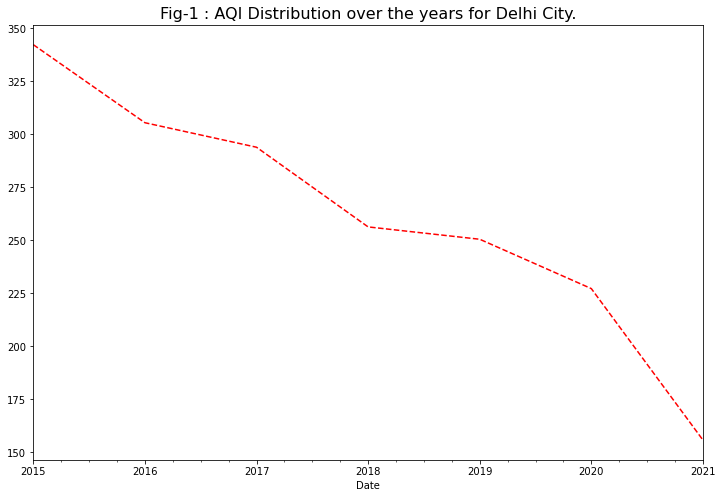

In [251]:
plt.figure(figsize=(12,8))
df2 = df1.groupby(pd.Grouper(freq='12M')).mean()
df2.AQI.plot(figsize=(7,20),color='red', linestyle='dashed', subplots=True)
plt.title('Fig-1 : AQI Distribution over the years for Delhi City.',fontsize=16)

After analyzing the AQI for Delhi, we get the Insight that after 2016, the AQI level is Significantly Improved every year. So, does Covid-19 Have any impact.

From this paper [Spatial patterns of trends in seasonal extreme temperatures](https://www.sciencedirect.com/science/article/pii/S2212094718301403#:~:text=According%20to%20the%20IMD%2C%20there,data%20and%20other%20data%20discrepancies.) and in general we have seasonal change So we will Check for those

Text(0.5, 1.0, 'Fig 2 : Yearly Data for Delhi')

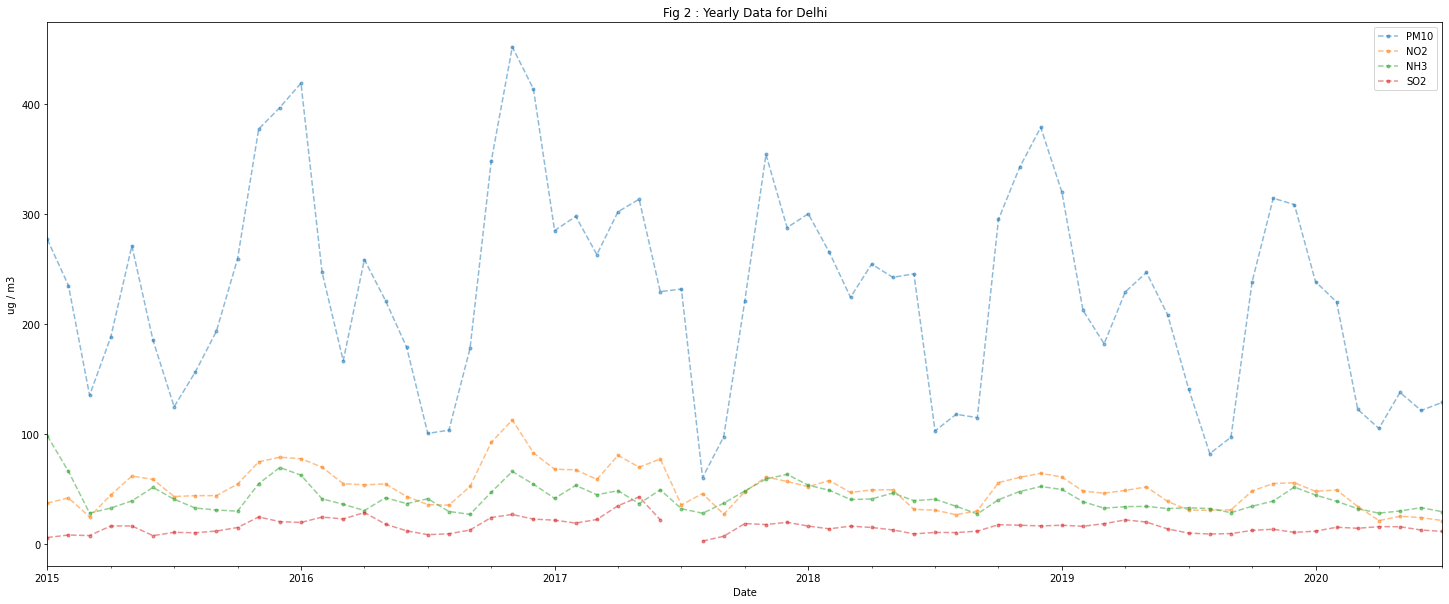

In [252]:
df3 = df1.iloc[:,:9:2].groupby(pd.Grouper(freq='1M')).mean()
df3.plot(marker='.', alpha=0.5, linestyle='--', figsize=(25, 10)).set_ylabel('ug / m3')
plt.title("Fig 2 : Yearly Data for Delhi")

As we can see It trends to rise at start of the year and goes Down after mid months.
PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.

SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also. 

In [253]:
df4 = df_delhi.copy()
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Year'] = df4['Date'].dt.year # year
df4['Month'] = df4['Date'].dt.month

<BarContainer object of 183 artists>

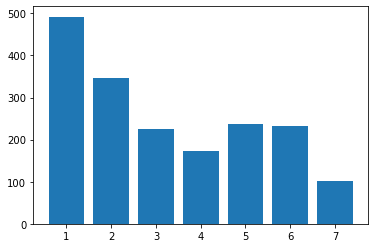

In [254]:
plt.bar(df4[df4['Year'] == 2020].Month,df4[df4['Year'] == 2020].AQI)

Text(0.5, 1.0, 'Fig 4 : Comparision between pre, post & lockdown')

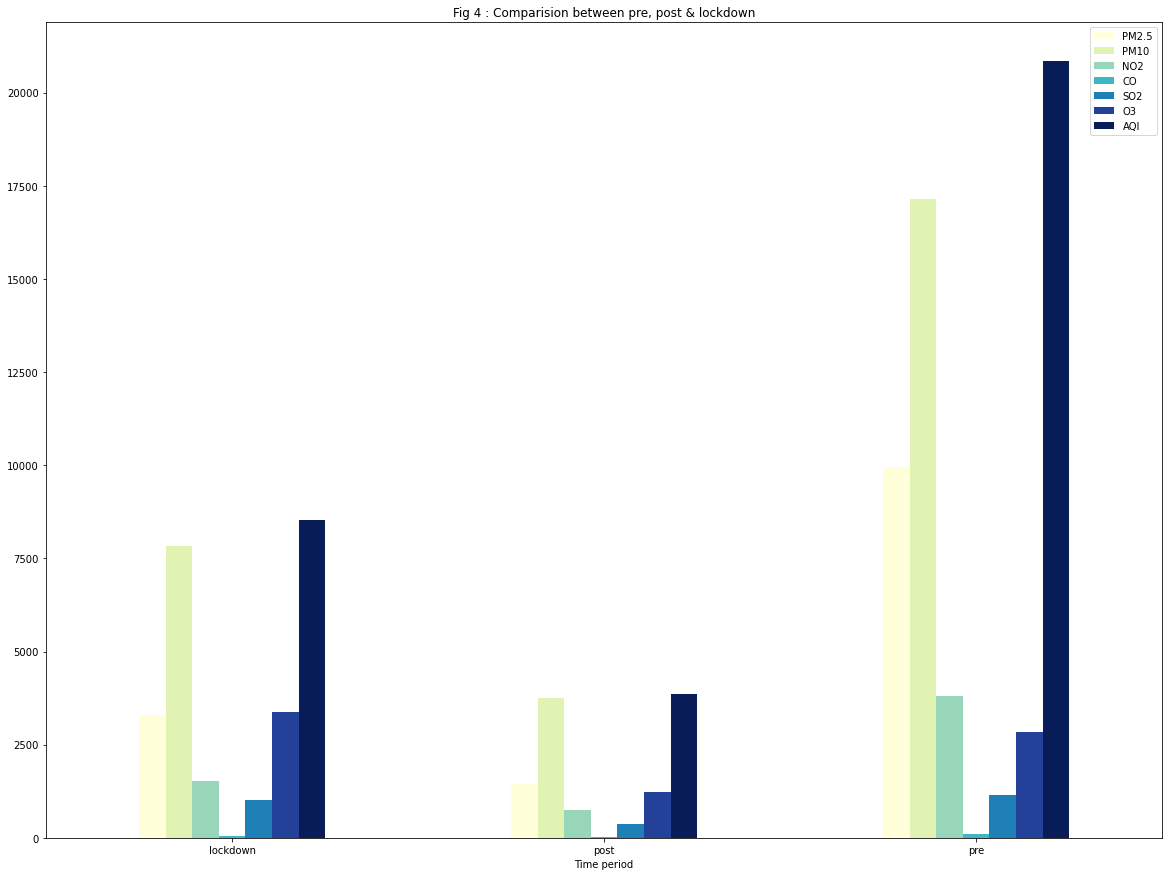

In [255]:
df_ppl = df4[df4['Year'] == 2020]
df_ppl["X"] = df_ppl["Date"].apply(lambda x: "pre" if (x <= dt.datetime(2020,3,24)) else ("lockdown" if ( x <= dt.datetime(2020,5,31)) & ( x >= dt.datetime(2020,3,24)) else ("post")))
col = ['PM2.5','PM10','NO2','CO','SO2','O3','AQI','X']
df_ppl = df_ppl[col]
df_ppl = df_ppl.groupby(['X']).sum()
df_ppl.plot.bar(figsize = [20,15],rot = 0,cmap= "YlGnBu").set_xlabel("Time period")
plt.title("Fig 4 : Comparision between pre, post & lockdown")

<AxesSubplot:title={'center':'Delhi Feature Study'}, xlabel='None-Year', ylabel='City'>

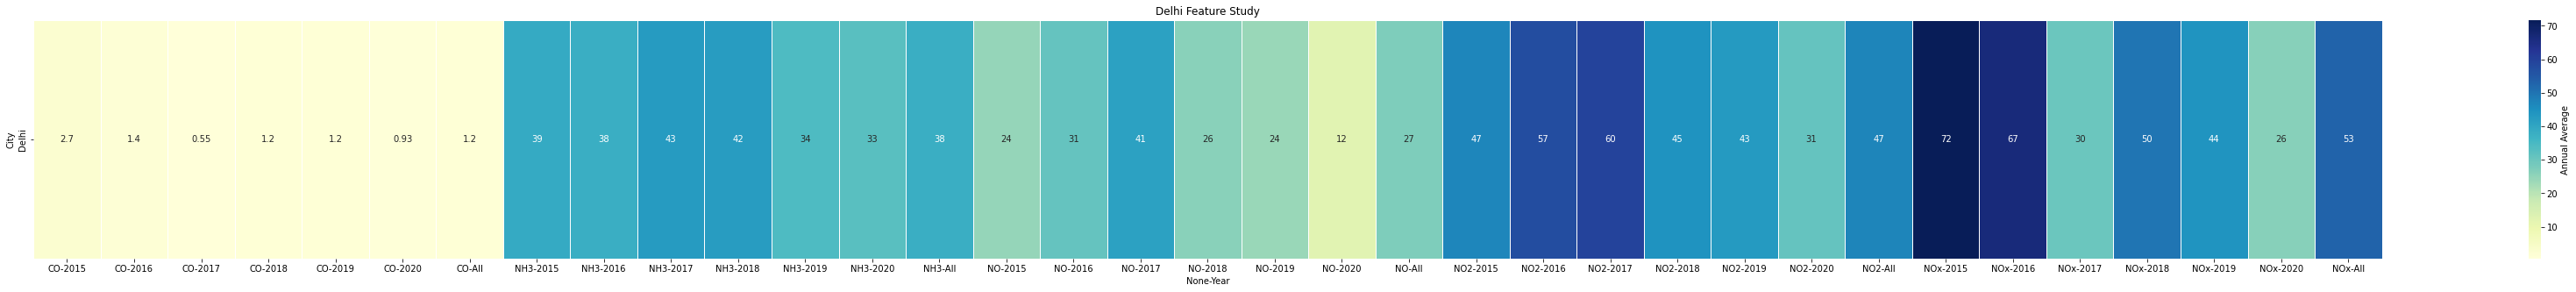

In [256]:
# City gases Analysis Using heatmap
f, ax = plt.subplots(figsize = (60,5))
ax.set_title('Delhi Feature Study')
sns.heatmap(df4.pivot_table(df4.iloc[:,4:9], index='City', columns = ['Year'], aggfunc = 'median', margins = True).iloc[0:1,:],
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

### Checking for Corelation

<AxesSubplot:>

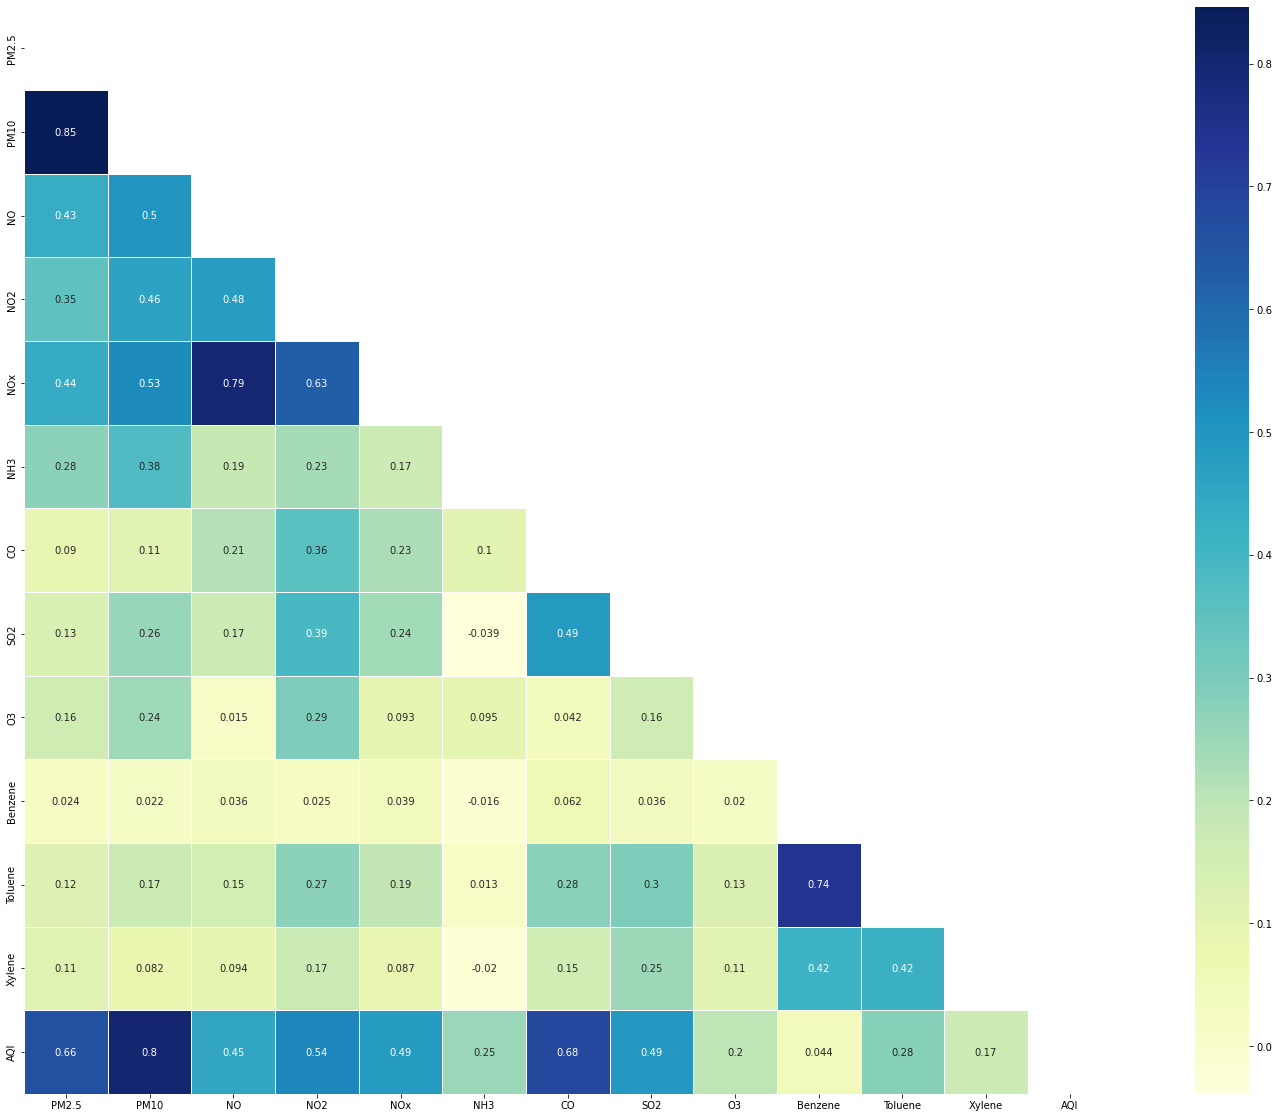

In [257]:
plt.figure(figsize = [30,20])
sns.heatmap(df.corr(),annot= True, linewidths= 1,square= True ,cmap= "YlGnBu", mask = np.triu(df.corr()))

From Above plot we can see that there is Significant positive correlation between features that are PM2/PM10, Carbon Monoxide, Nitrogen Dioxide which all have correlation of 50% or higher 

#### **So ,Coming Back to our problem - Does Lock-down made impact on air quality and how Does Delhi Performing ?**


Lock-down in whole country begin at 24 march 2020 as phase 1 for 21 days and due to lack of improvement in Covid-19 situation it was carry forwarded to 54 days as 4 phase protocol so for comparison of AQI we will plot 2 Year graph accordingly.

In [258]:
# considering year wise data for both year's
df_2019 = df4[df4["Year"] == 2019]
df_2020 = df4[df4["Year"] == 2020]


df_2019['Date'] = df_2019.Date.apply(lambda x: x.strftime('%m-%d'))
df_2020['Date'] = df_2020.Date.apply(lambda x: x.strftime('%m-%d'))
df_2020 = df_2020.set_index("Date", drop= True)
df_2019 = df_2019.set_index("Date", drop= True)
df_2019 = df_2019.iloc[:182,:]

Text(0.5, 1.0, 'Fig 3 : AQI 19-20')

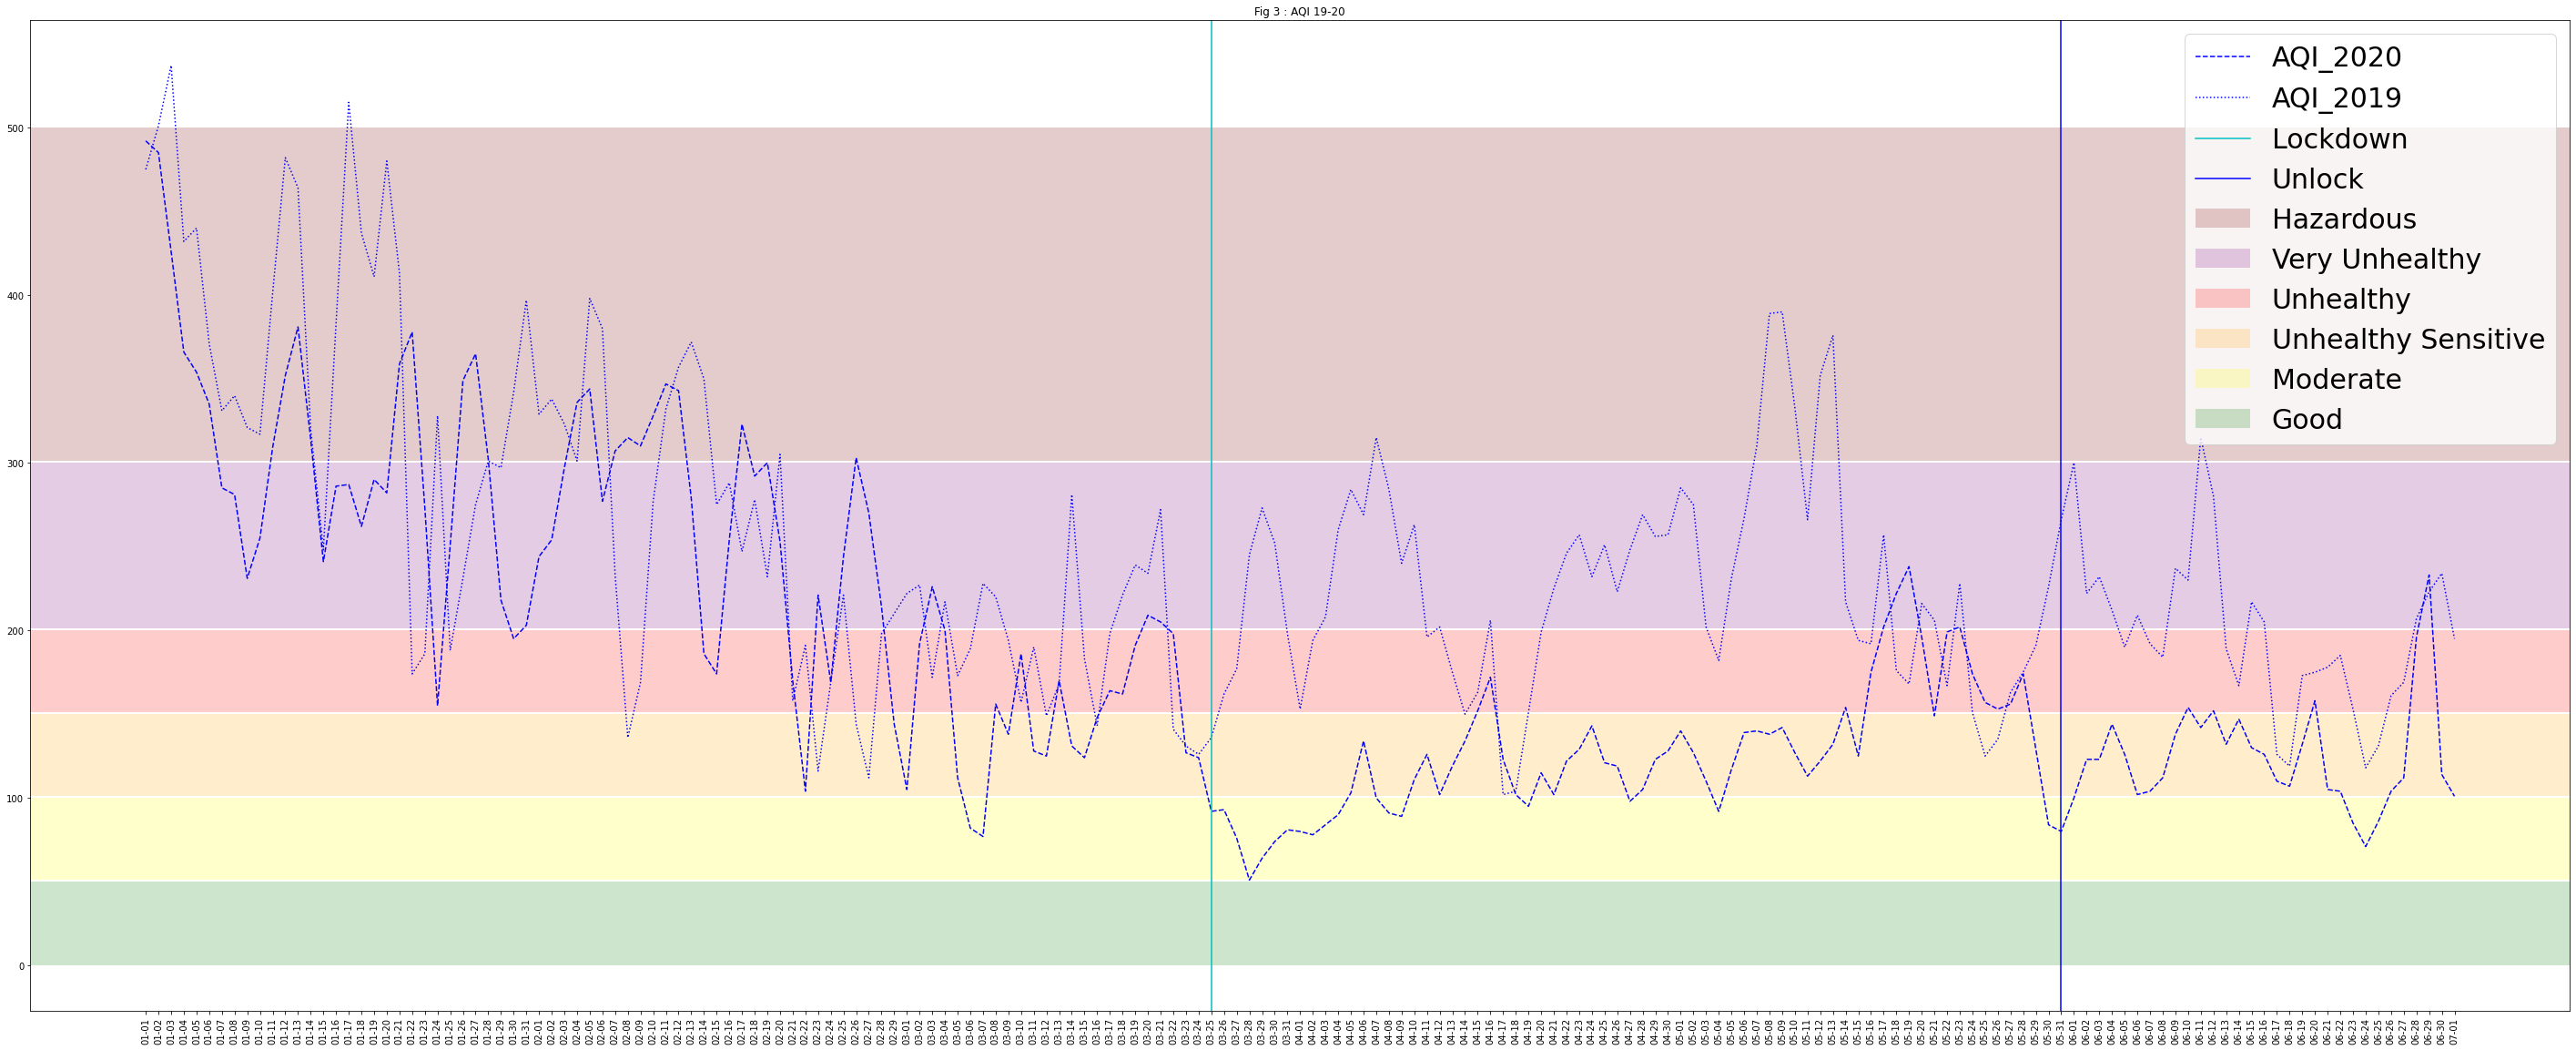

In [318]:
plt.figure(figsize = [50,20])
plt.plot(df_2020["AQI"],color='blue', linestyle='--', label = 'AQI_2020')
plt.plot(df_2019["AQI"],color='blue', linestyle='dotted',label = 'AQI_2019')
plt.xticks(rotation=90)
plt.axhspan(301, 500, facecolor='maroon', alpha=0.2, label='Hazardous')
plt.axhspan(201, 300, facecolor='purple', alpha=0.2, label='Very Unhealthy')
plt.axhspan(151, 200, facecolor='red', alpha=0.2, label='Unhealthy')
plt.axhspan(101, 150, facecolor='orange', alpha=0.2, label='Unhealthy Sensitive')
plt.axhspan(51, 100, facecolor='yellow', alpha=0.2, label='Moderate')
plt.axhspan(0, 50, facecolor='green', alpha=0.2, label='Good')
plt.axvline('03-25',ls='-', c='c', label='Lockdown')
plt.axvline('05-31',ls='-', c='blue', label='Unlock')
plt.legend(fontsize=30)
plt.title("Fig 3 : AQI 19-20")

From above plot we can see that as compare to 2019 we can see significant change in Air quality index during lock down in 2020.

As, we can recall We have seen AQI for delhi is Drastically decreasing from year 2015 to 2020.

So,"Air quality index in covid-19 time period of 2020 is better than 2019 ?"  we will Find it out performing Statistical Test.

### **Hypothesis Testing**

* **Null Hypothesis:** There is no statistically significant difference between AQI during the lock-down period of 2020 and the same time period in 2019.
* **Test**: One-way analysis of variance and whether (ANOVA) two categorical variables are related or independent (P-Test).
* **α**: 0.05

In [279]:
d_20 = df4[(df4["Date"] <= dt.datetime(2020,5,31)) & (df4["Date"] >= dt.datetime(2020,3,24))]
d_19 = df4[(df4["Date"] <= dt.datetime(2019,5,31)) & (df4["Date"] >= dt.datetime(2019,3,24))]
F, p = f_oneway(d_19['AQI'], d_20['AQI'])
print('p-value :',p)

p-value : 1.7549217144981576e-20


Text(0.5, 1.0, 'AQI Distribution of 2019 and 2020')

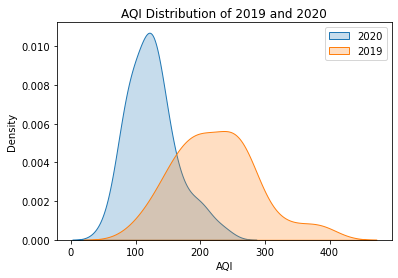

In [292]:
sns.kdeplot(d_20["AQI"],fill= True)
sns.kdeplot(d_19["AQI"],fill= True)
plt.legend(["2020", "2019"])
plt.title("AQI Distribution of 2019 and 2020")

The p value for this test comes out to be  1.75 * $10^{-20}$, which is lower than our defined value of α (0.05), thus we reject the null hypothesis.

The hypothesis tells us that Delhi had Significant impact of COVID-19 on its air pollution/air quality. However, This Type of event's are extremely rare, which make them very tough to draw insight from them.

Let us see other impact on environment and Dive deep into Gis data.

#### **A look at Pollution levels through Satellites**
We will explore one of important trace gases of Earth's atmosphere NO2 / NO (Nitrogen Oxide).

They enter the atmosphere as a result of anthropogenic activities (notably fossil fuel combustion and biomass burning) and natural processes (wildfires, lightning, and microbiological processes in soils).Here, NO2 is used to represent concentrations of collective nitrogen oxides because during daytime, i.e. in the presence of sunlight, a photochemical cycle involving ozone (O3) converts NO into NO2 and vice versa on a timescale of minutes.



In [25]:
map = geemap.Map(center = [28.610912462627958, 77.20605302696711],zoom = 8)

layer1 = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_NO2")\
    .filterDate("2020-01-01","2020-02-29")\
    .select("tropospheric_NO2_column_number_density")
    
layer2 = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_NO2")\
    .filterDate("2020-05-31","2020-06-30")\
    .select("tropospheric_NO2_column_number_density")
c_p = ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
band_viz = {"min": 0,"max": 0.0002,"palette":c_p}

map.addLayer(layer1.max(), band_viz, 'pre_lockdown', False, opacity= 0.5)
map.addLayer(layer2.max(), band_viz, 'post_lockdown',False, opacity= 0.5)
map.addLayerControl()
map

Map(center=[28.610912462627958, 77.20605302696711], controls=(WidgetControl(options=['position', 'transparent_…

#### NDVI

To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (NIR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs). NDVI always ranges from -1 to +1.

In [4]:
ee.Initialize()

Text(0, 0.5, 'ug / m3')

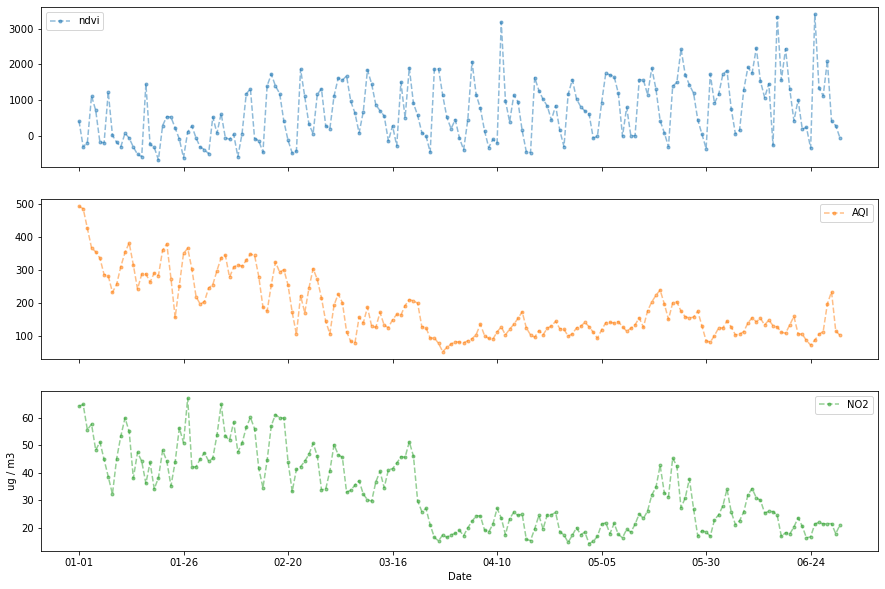

In [114]:
layer4 = ee.ImageCollection("NOAA/CDR/AVHRR/NDVI/V5")\
    .filterDate('2020-1-1','2020-8-3').select("NDVI")

def Ndvi(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=ee.FeatureCollection("projects/ee-chikaneyash143/assets/admin_Delhi").geometry()).get("NDVI")
    return img.set('date', img.date().format()).set('mean',mean)

ndvireduced_imgs = layer4.map(Ndvi)
n_list = ndvireduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
df_ndvi = pd.DataFrame(n_list.getInfo(), columns=['date','mean'])
df5 = pd.DataFrame({'ndvi':list(df_ndvi['mean']), 'AQI':df_2020.AQI, 'NO2':df_2020['NO2']})
df5.plot(marker='.', alpha=0.5, linestyle='--', figsize=(15, 10), subplots = True)
plt.ylabel('ug / m3')

<AxesSubplot:>

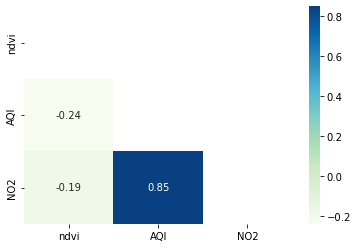

In [120]:
sns.heatmap(df5.corr(),annot= True,cmap= "GnBu", mask = np.triu(df5.corr()) )

The analysis shows that AQI Areas with higher NDVI values have relatively low AQI. There is a negative correlation between NDVI and AQI

some important links
- [NASA Stories](https://www.youtube.com/watch?v=ZYGd-llxHJE)
- [Air](https://www.youtube.com/watch?v=7t4sGK8yxYA)

### Conclusion:

* **Delhi** is the **most polluted city in terms of vehicular pollution** contents.

* **Delhi** is One of The most Air Polluted State in india and **not able to follow National air quality index Suggested by WHO**. We can also see significant improvement in Air quality during Lockdown But, **after initial unlock AQI is Reaching it Previous High**.

* **Hypothesis testing** was conducted for **air pollution during the lockdowns**. The null hypothesis was rejected with a **p-value of  1.75 * $10^{-20}$**.

* looking at **satellite imagery** And From **EDA** the quality of air is **improved** because of the more **restricted activities** of people; **suspended transport services such as road, air, and rail; and shut down of maximum industries and educational institutions**

* This study gives a very important lesson to us—**if we need good health and better living**, then we need to **reduce** the use of **transport** (if not required) and to focus on the alternative solution strongly.strong possibility for improvement in **particulate matter emissions** is possible by leveraging **better resource management in urbanization and transport**.

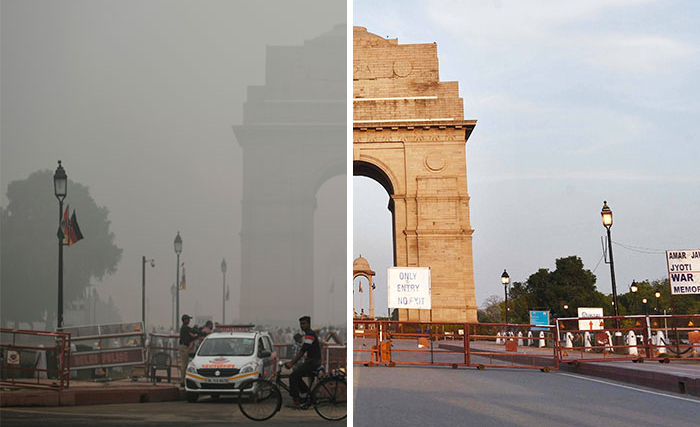

In [1]:
from IPython.display import Image, display
image = display(Image(filename = "Images/before_after.png"))
image